# How to use _TrainRuns.jl_ - A basic tutorial.

> This work is under ISC License.
>
> Copyright 2022 Martin Scheidt, ORCID: [0000-0002-9384-8945](https://orcid.org/0000-0002-9384-8945).
>
> Permission to use, copy, modify, and/or distribute this file for any purpose with or without fee is hereby granted, provided that the above copyright notice and this permission notice appear in all copies."

## Introduction

Besides _TrainRuns.jl_, we will need data for trains and running paths. You might find helpful rolling stock data at [railtoolkit/rolling-stock-data](https://github.com/railtoolkit/rolling-stock-data), which can be composed into a train. Path data is harder to come by: OpenStreetMap might be a good starting point.

We will use predefined data as a showcase in this Tutorial with the following files:

In [2]:
readdir("data")

7-element Vector{String}:
 "block_sections.yaml"
 "freight_train.yaml"
 "local_train.yaml"
 "path_schema_example.yaml"
 "realworld_path.yaml"
 "simple_path.yaml"
 "train_schema_example.yaml"

As a prerequisite, we need to install a few packages:

In [46]:
# import Pkg
# Pkg.add("TrainRuns") # main package to calculate train runs
# Pkg.add("Makie")# visualization
# Pkg.add("CairoMakie")# visualization

## Loading Train data

To calculate train runs and work with data we need to load the package:

In [2]:
using TrainRuns

Next we can load data for a train and a path. Currently, the supported file format is a YAML file in the [railtoolkit/schema](https://github.com/railtoolkit/schema). The schema provides a simple data structure. The following (non-functional) example demonstrates the structure of a train:

```YAML
%YAML 1.2
---
schema: https://railtoolkit.org/schema/rolling-stock.json
schema_version: "2022.05"
trains:
  - name: "example"
    id: "1"
    formation: [veh1,veh2,veh2]

vehicles:
  - name: "loco"
    id: "veh1"
    vehicle_type: traction
    length: 20
    mass: 100
    ...
  - name: "passenger car"
    id: "veh2"
    vehicle_type: passenger
    length: 30
    mass: 40
    ...
```

We can load a train via the YAML file and the _Train_ type constructor:

In [3]:
freight_train = Train("data/freight_train.yaml")

Train("V 90 with 10 ore wagons of type Facs 124", "Fr100", UUID("b539eefc-21bb-41b0-8a48-1d56b8d56321"), 204.71999999999997, 920000.0, 80000, 0, 840000.0, 1.0445454545454544, 1.09, 1.03, :freight, 22.22222222222222, -0.225, 2.2, 0, 0.01, 1.4000000000000001, 0.0, 3.8999999999999995, Tuple{Real, Real}[(0.0, 186940), (0.2777777777777778, 186940), (0.5555555555555556, 182310), (0.8333333333333333, 177680), (1.1111111111111112, 173050), (1.3888888888888888, 168420), (1.6666666666666665, 163790), (1.9444444444444444, 159160), (2.2222222222222223, 154530), (2.5, 149240)  …  (19.72222222222222, 30940), (20.0, 30440), (20.27777777777778, 29960), (20.555555555555554, 29490), (20.833333333333332, 29030), (21.11111111111111, 28590), (21.38888888888889, 28170), (21.666666666666668, 27760), (21.944444444444443, 27360), (22.22222222222222, 26980)])

... and a second train:

In [4]:
passenger_train = Train("data/local_train.yaml")

Train("Regional Train", "RB50-1", UUID("fefb45ef-fa25-430c-93cf-38e2e7bdba25"), 41.7, 88000.0, 45333.0, 22667.0, 0, 1.08, 1.08, 0, :passenger, 33.333333333333336, -0.4253, 3.0, 1.4, 3.9, 0, 0, 0, Tuple{Real, Real}[(0.0, 94400), (0.2777777777777778, 94400), (0.5555555555555556, 92800), (0.8333333333333333, 91200), (1.1111111111111112, 89600), (1.3888888888888888, 88000), (1.6666666666666665, 86400), (1.9444444444444444, 84800), (2.2222222222222223, 83200), (2.5, 81600)  …  (30.833333333333332, 14460), (31.11111111111111, 14340), (31.38888888888889, 14210), (31.666666666666664, 14080), (31.944444444444443, 13960), (32.22222222222222, 13840), (32.5, 13720), (32.77777777777778, 13610), (33.05555555555556, 13490), (33.333333333333336, 13380)])

## Loading path data

The [railtoolkit/schema](https://github.com/railtoolkit/schema) also provides a schema for path:

```YAML
%YAML 1.2
---
schema: https://railtoolkit.org/schema/running-path.json
schema_version: "2022.05"
paths:
  - name: "example"
    id: simple
    points_of_interest:
      # [ station in m,                name,   front or rear ]
      - [      5000.00,            "label1",           front ]
      - [      7500.00,            "label2",            rear ]
      ...
    characteristic_sections:
      # [ station in m, speed limit in km/h, resistance in ‰ ]
      - [          0.0,                 160,            0.00 ]
      ...
      - [      10000.0,                 160,            0.00 ]
```

It is assumed that a train run will start at the first Characteristic Section and end at the last Characteristic Section. If the train needs an intermediate stop, you will have to split the path into two separate ones. The Points of Interest can be used to compute running time values at the specified location either for the front or the rear of the train.

We can load a path via the YAML file and the _Path_ type constructor:

In [6]:
simple_path = Path("data/simple_path.yaml")

Path("10 km, different gradient, 160 km/h", "simple", UUID("efdd7a26-0bc8-44eb-8c95-7c659deaaef6"), Any[Dict{Symbol, Any}(:station => 5000.0, :label => "label1", :measure => "front"), Dict{Symbol, Any}(:station => 7500.0, :label => "label2", :measure => "rear")], Any[Dict(:s_end => 1000.0, :v_limit => 44.44444444444444, :f_Rp => 0.0, :s_start => 0.0), Dict(:s_end => 2000.0, :v_limit => 44.44444444444444, :f_Rp => 1.0, :s_start => 1000.0), Dict(:s_end => 3000.0, :v_limit => 44.44444444444444, :f_Rp => 2.0, :s_start => 2000.0), Dict(:s_end => 4000.0, :v_limit => 44.44444444444444, :f_Rp => 5.0, :s_start => 3000.0), Dict(:s_end => 5000.0, :v_limit => 44.44444444444444, :f_Rp => -3.0, :s_start => 4000.0), Dict(:s_end => 6000.0, :v_limit => 44.44444444444444, :f_Rp => 5.0, :s_start => 5000.0), Dict(:s_end => 7000.0, :v_limit => 44.44444444444444, :f_Rp => -10.0, :s_start => 6000.0), Dict(:s_end => 8000.0, :v_limit => 44.44444444444444, :f_Rp => 15.0, :s_start => 7000.0), Dict(:s_end => 8500

## Calculating running times

We now can calculate running times with the two trains and the path previously loaded with _trainrun()_:

In [7]:
trainrun(freight_train, simple_path)

,t
,Float64
1,814.104


The return value is a _DataFrame_ with a single value for the total running time. It seems over the top to return a _DataFrame_ for a single value, but this format was chosen to have a unified return value where more values are asked for.

We can access the value in the _DataFrame_ directly with `[row, column]`:

In [8]:
trainrun(passenger_train, simple_path)[end,:t]

395.512

All units of the values follow the SI-system - accordingly, the time is in seconds.

## Calculating Points of Interest

_Points of Interest_ are points along the path where we want exact time, speed, and position. They can be calculated for the front or the rear of the train and have to be specified with a _label_ in the path file. To instruct the function to return the _Points of Interest_, we must change the settings:

In [9]:
settings_poi = Settings(outputDetail=:points_of_interest)

Settings(:mass_point, :distance, 20, 3, :points_of_interest, :dataframe)

Now the _DataFrame_ returns significantly more data:

In [10]:
trainrun(freight_train, simple_path, settings_poi)

,label,driving_mode,s,v,t,a,F_T,F_R,R_path
,String,String,Real,Real,Real,Real,Real,Real,Real
1,label1,diminishing,5000.0,15.897,442.61,-0.031,39270.3,68894.9,45110.6
2,label2,diminishing,7704.72,14.893,607.816,-0.121,41903.7,1.57829e5,1.35332e5


## Blocking time

Blocking time is the time a train exclusivly occupies a block. The next train can follow after that time. The blocking time is vidualizte in a time-distance-diagram as follows:

![](figures/blocking_time_light.png)

If we want to calculate the blocking time for a train run, we can add the distance of each element of a block in the list of _Points of Interest_ in the path description.

Consider the following infrastructure with two blocks. The first block starts at the main signal _0_ and ends at the main signal _1_. The second block starts at the main signal _1_ and ends at the main signal _2_:

![](figures/infra_light.png)

The infrastructure will translate into the following _Points of Interest_ with made up distances and meaningful labels:

In [12]:
println(String(read("data/block_sections.yaml")))

%YAML 1.2
---
schema: https://railtoolkit.org/schema/running-path.json
schema_version: "2022.05"
paths:
  - name: "10 km, 160 km/h"
    id: block_sections
    UUID: b3e6f0b0-6109-45ea-a1e2-0f5b03c66203
    points_of_interest:
      # [ station in m,                 name,   front or rear ]
      - [      1850.00,       "0:view point",           front ]
      - [      2000.00,   "0:distant signal",           front ]
      - [      3000.00,      "0:main signal",           front ]
      - [      3050.00,   "0:clearing point",            rear ]
      - [      3350.00,       "1:view point",           front ]
      - [      3500.00,   "1:distant signal",           front ]
      - [      4500.00,      "1:main signal",           front ]
      - [      4550.00,   "1:clearing point",            rear ]
      - [      4850.00,       "2:view point",           front ]
      - [      5000.00,   "2:distant signal",           front ]
      - [      6000.00,      "2:main signal",           front ]
      

First, we need to load the _Path_ with the _Points of Interest_:

In [13]:
block_sections = Path("data/block_sections.yaml")

Path("10 km, 160 km/h", "block_sections", UUID("b3e6f0b0-6109-45ea-a1e2-0f5b03c66203"), Any[Dict{Symbol, Any}(:station => 1850.0, :label => "0:view point", :measure => "front"), Dict{Symbol, Any}(:station => 2000.0, :label => "0:distant signal", :measure => "front"), Dict{Symbol, Any}(:station => 3000.0, :label => "0:main signal", :measure => "front"), Dict{Symbol, Any}(:station => 3050.0, :label => "0:clearing point", :measure => "rear"), Dict{Symbol, Any}(:station => 3350.0, :label => "1:view point", :measure => "front"), Dict{Symbol, Any}(:station => 3500.0, :label => "1:distant signal", :measure => "front"), Dict{Symbol, Any}(:station => 4500.0, :label => "1:main signal", :measure => "front"), Dict{Symbol, Any}(:station => 4550.0, :label => "1:clearing point", :measure => "rear"), Dict{Symbol, Any}(:station => 4850.0, :label => "2:view point", :measure => "front"), Dict{Symbol, Any}(:station => 5000.0, :label => "2:distant signal", :measure => "front"), Dict{Symbol, Any}(:station =

Then, we can calculate the passing of the train at these points:

In [14]:
run_block = trainrun(passenger_train, block_sections, settings_poi)

,label,driving_mode,s,v,t,a,F_T,F_R
,String,String,Real,Real,Real,Real,Real,Real
1,0:view point,accelerating,1850.0,26.897,101.495,0.106,14968.5,4897.38
2,0:distant signal,accelerating,2000.0,27.476,107.012,0.104,14864.3,5019.73
3,0:main signal,accelerating,3000.0,30.788,141.292,0.091,14435.8,5763.22
4,0:clearing point,accelerating,3091.7,31.058,144.257,0.09,14363.0,5826.95
5,1:view point,accelerating,3350.0,31.776,152.478,0.085,14032.8,5999.19
6,1:distant signal,accelerating,3500.0,32.167,157.17,0.082,13864.0,6094.4
7,1:main signal,cruising,4500.0,33.333,187.428,0.0,6384.71,6384.71
8,1:clearing point,cruising,4591.7,33.333,190.179,0.0,6384.71,6384.71
9,2:view point,cruising,4850.0,33.333,197.928,0.0,6384.71,6384.71


With the _DataFrame_ above we can filter the times we need for the occupation time of Block A (from signal 0 to signal 1).

The starting time of the occupation begins with the view point:

In [15]:
start_block_A = filter(row -> any(occursin.(["0:view point"], row.label)), run_block)[1,:t]

101.495

The trains enters the block at the first main signal (0) and leaves it at the second main signal (1):

In [16]:
ingress_block_A = filter(row -> any(occursin.(["0:main signal"], row.label)), run_block)[1,:s]

3000.0

In [17]:
egress_block_A = filter(row -> any(occursin.(["1:main signal"], row.label)), run_block)[1,:s]

4500.0

The occupation time ends when the train clears the block at the clearing point:

In [18]:
end_block_A = filter(row -> any(occursin.(["1:clearing point"], row.label)), run_block)[1,:t]

190.179

With the filtered data we can calculate the occupation time and the block length:

In [20]:
blocking_time_A = end_block_A - start_block_A

88.684

In [21]:
block_length_A = egress_block_A - ingress_block_A

1500.0

And we can do the same for Block B (from signal 1 to signal 2):

In [22]:
start_block_B = filter(row -> any(occursin.(["1:view point"], row.label)), run_block)[1,:t]

152.478

In [23]:
ingress_block_B = filter(row -> any(occursin.(["1:main signal"], row.label)), run_block)[1,:s]

4500.0

In [24]:
end_block_B = filter(row -> any(occursin.(["2:clearing point"], row.label)), run_block)[1,:t]

235.179

In [25]:
egress_block_B = filter(row -> any(occursin.(["2:main signal"], row.label)), run_block)[1,:s]

6000.0

In [26]:
blocking_time_B = end_block_B - start_block_B

82.701

In [27]:
block_length_B = egress_block_B - ingress_block_B

1500.0

Note: For the complete blocking time we should add a time for clearing the signal and a release time. But for this example we will waive.

## Visualization

If we want not only to calculate running times and blocking times but also plot them, we need some additional packages for plotting:

In [28]:
using CairoMakie

It is necessary to have enough data points so that the plot covers the complete train run and has a relatively smooth curve for plotting.

To achieve this, we change the settings of the _outputDetails_ to give us the `driving_course` for all the data points:

In [29]:
settings_all = Settings(outputDetail=:driving_course)

Settings(:mass_point, :distance, 20, 3, :driving_course, :dataframe)

... and than execute the run:

In [30]:
run = trainrun(passenger_train, block_sections, settings_all)

,label,driving_mode,s,v,t,a,F_T,F_R,R_path,R_traction
,String,String,Real,Real,Real,Real,Real,Real,Real,Real
1,,breakFree,0.0,0.0,0.0,0.975,94400.0,1703.41,0.0,1703.41
2,,accelerating,20.0,6.246,6.404,0.575,56681.3,2010.35,0.0,2010.35
3,,accelerating,40.0,7.875,9.237,0.459,45712.2,2133.67,0.0,2133.67
4,,accelerating,60.0,8.965,11.612,0.384,38677.3,2226.08,0.0,2226.08
5,,accelerating,80.0,9.783,13.745,0.359,36379.5,2300.78,0.0,2300.78
6,,accelerating,100.0,10.49,15.718,0.35,35600.0,2368.99,0.0,2368.99
7,,accelerating,120.0,11.137,17.568,0.349,35600.0,2434.29,0.0,2434.29
8,,accelerating,140.0,11.747,19.316,0.348,35585.5,2498.47,0.0,2498.47
9,,accelerating,160.0,12.326,20.978,0.343,35179.6,2561.66,0.0,2561.66


We now need to create a canvas to get a plot. The package _Makie_ provides the canvas. Please refer to its [documentation](https://docs.juliahub.com/MakieGallery/) for how it works and is to be used. The following code will produce a figure with two but still empty diagrams. A distance-speed-diagram (sv\_diagram) on top and a distance-time-diagram (st\_diagram) below:

In [31]:
# new but empty figure
fig = Figure()
#  adding distance speed axis to the figure
sv_diagram = Axis(fig[1,1],
    # title = "s-v-diagram",
    xlabel = "distance in km",
    xaxisposition =  :top,
    xticks = 0:2:run.s[end]/1000,
    xticksmirrored = true,
    ylabel = "speed in km/h",
    ytickformat = "{:.1f}",
    yticks = 0:20:maximum(run.v)*3.6+20,
    yticksmirrored = true
)
# adding distance time axis to the figure
st_diagram = Axis(fig[2:4,1],
    # title = "s-t-diagram",
    xlabel = "distance in km",
    xaxisposition =  :bottom,
    xticks = 0:2:run.s[end]/1000,
    xticksmirrored = true,
    ylabel = "time in min",
    ytickformat = "{:.1f}",
    yticksmirrored = true,
    yreversed = true
)
linkxaxes!(sv_diagram, st_diagram)

We now can add our data from run converted in the right dimensions to both diagrams:

In [32]:
lines!(sv_diagram, run.s./1000, run.v.*3.6, color = :blue)
lines!(st_diagram, run.s./1000, run.t./60, color = :blue)

Lines{Tuple{Vector{Point{2, Float32}}}}

We must recall our figure variable to show the figure:

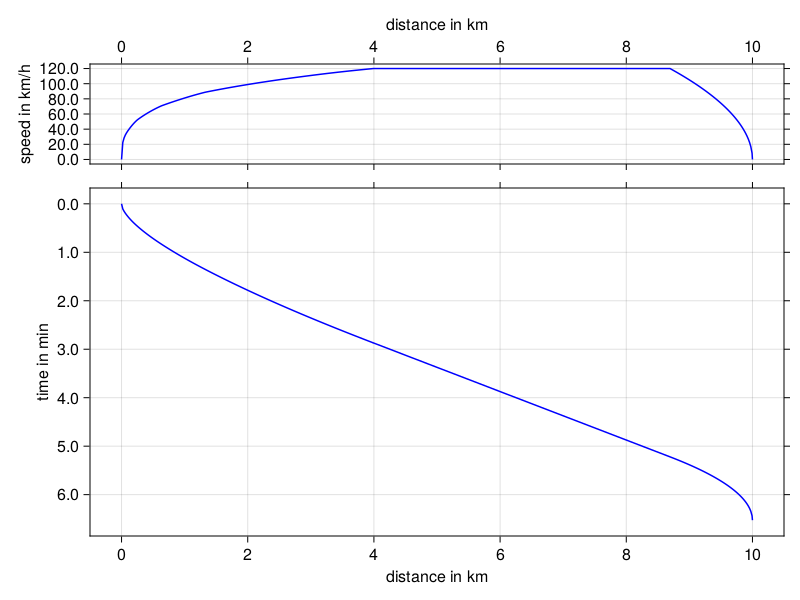

In [33]:
fig

We need rectangles to add blocking times. Graphical rectangles are provided by:

In [34]:
using Makie.GeometryBasics

Now, we can draw a rectangle with the origin at (s,t) and a width/height as a vector (+s,+t):
```Julia
Rect(s,t,+s,+t)
```

The following commands will create geometric rectangles for both blocks (A and B):

In [37]:
block_A = Rect(
    ingress_block_A/1000, start_block_A/60, # origin
    block_length_A/1000, blocking_time_A/60 # width and height
)
block_B = Rect(
    ingress_block_B/1000, start_block_B/60,
    block_length_B/1000, blocking_time_B/60
)

Rect2{Float64}([4.5, 2.5413], [1.5, 1.37835])

We now can add the rectangles to plot and update the figure:

In [38]:
poly!(st_diagram, [block_A, block_B], color=:transparent, strokecolor = :blue, strokewidth = 1)

Combined{Makie.poly, Tuple{Vector{Rect2{Float64}}}}

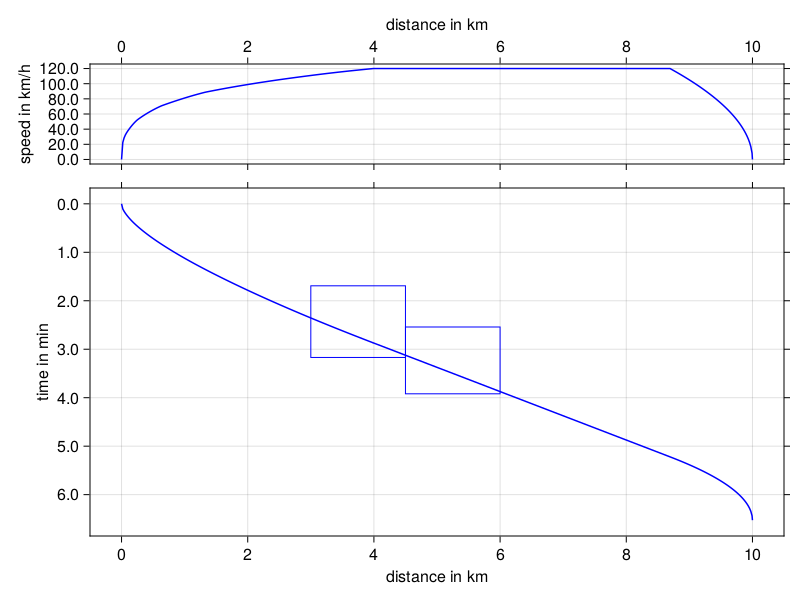

In [39]:
fig # recall the figure for plotting

## Real world example

The following example summarizes the usage with an example of different speed limits and track resistances. For the path, we use the [Görlitz–Dresden railway](https://en.wikipedia.org/wiki/Görlitz–Dresden_railway) and the trains from before.
![](https://upload.wikimedia.org/wikipedia/commons/a/a0/Map-of-6212-G%C3%B6rlitz-Dresden.png)

In [40]:
realworld_path = Path("data/realworld_path.yaml")

Path("'infra_Ostsachsen': track id='tr_80.6212_2' name='DG-DN' -> spp_5", "realworld", UUID("2b31a0c5-85bc-4721-b7e0-66f9df95f7b6"), Any[], Any[Dict(:s_end => 318.0, :v_limit => 11.11111111111111, :f_Rp => 0.0, :s_start => 0.0), Dict(:s_end => 399.0, :v_limit => 11.11111111111111, :f_Rp => 2.0, :s_start => 318.0), Dict(:s_end => 500.0, :v_limit => 11.11111111111111, :f_Rp => -3.0, :s_start => 399.0), Dict(:s_end => 579.0, :v_limit => 11.11111111111111, :f_Rp => 0.0, :s_start => 500.0), Dict(:s_end => 784.0, :v_limit => 11.11111111111111, :f_Rp => 1.0, :s_start => 579.0), Dict(:s_end => 868.0, :v_limit => 11.11111111111111, :f_Rp => 5.3, :s_start => 784.0), Dict(:s_end => 1082.0, :v_limit => 11.11111111111111, :f_Rp => 20.0, :s_start => 868.0), Dict(:s_end => 1287.0, :v_limit => 11.11111111111111, :f_Rp => 16.1, :s_start => 1082.0), Dict(:s_end => 1800.0, :v_limit => 11.11111111111111, :f_Rp => 18.1, :s_start => 1287.0), Dict(:s_end => 2242.0, :v_limit => 30.555555555555554, :f_Rp => 18

In [41]:
run_realworld_passenger = trainrun(passenger_train, realworld_path, settings_all)

,label,driving_mode,s,v,t,a,F_T,F_R,R_path
,String,String,Real,Real,Real,Real,Real,Real,Real
1,,breakFree,0.0,0.0,0.0,0.975,94400.0,1703.41,0.0
2,,accelerating,20.0,6.246,6.404,0.575,56681.3,2010.35,0.0
3,,accelerating,40.0,7.875,9.237,0.459,45712.2,2133.67,0.0
4,,accelerating,60.0,8.965,11.612,0.384,38677.3,2226.08,0.0
5,,accelerating,80.0,9.783,13.745,0.359,36379.5,2300.78,0.0
6,,accelerating,100.0,10.49,15.718,0.35,35600.0,2368.99,0.0
7,,accelerating,102.0,10.557,15.909,0.35,35600.0,2375.57,0.0
8,,accelerating,104.0,10.623,16.097,0.35,35600.0,2382.14,0.0
9,,accelerating,106.0,10.688,16.285,0.349,35600.0,2388.69,0.0


In [42]:
run_realworld_freight = trainrun(freight_train, realworld_path, settings_all)

,label,driving_mode,s,v,t,a,F_T,F_R,R_path
,String,String,Real,Real,Real,Real,Real,Real,Real
1,,breakFree,0.0,0.0,0.0,0.181,186940.0,13258.8,0.0
2,,accelerating,20.0,2.689,14.877,0.138,1.45761e5,13560.1,0.0
3,,accelerating,40.0,3.568,21.27,0.121,1.30408e5,13789.3,0.0
4,,accelerating,60.0,4.194,26.423,0.111,1.20455e5,13991.5,0.0
5,,accelerating,80.0,4.692,30.925,0.103,113093.0,14176.1,0.0
6,,accelerating,100.0,5.112,35.004,0.097,1.07291e5,14347.6,0.0
7,,accelerating,120.0,5.478,38.782,0.092,1.02527e5,14508.8,0.0
8,,accelerating,140.0,5.802,42.328,0.087,98500.3,14661.4,0.0
9,,accelerating,160.0,6.096,45.69,0.083,95022.5,14806.7,0.0


In [43]:
# new but empty figure
fig_realworld = Figure()
#  adding distance speed axis to the figure
sv_diagram_realworld = Axis(fig_realworld[1,1],
    # title = "s-v-diagram",
    xlabel = "distance in km",
    xaxisposition =  :top,
    xticks = 0:10:run_realworld_passenger.s[end]/1000,
    xticksmirrored = true,
    ylabel = "speed in km/h",
    ytickformat = "{:.1f}",
    yticks = 0:20:maximum(run_realworld_passenger.v)*3.6+20,
    yticksmirrored = true
)
# adding distance time axis to the figure
st_diagram_realworld = Axis(fig_realworld[2:4,1],
    # title = "s-t-diagram",
    xlabel = "distance in km",
    xaxisposition =  :bottom,
    xticks = 0:10:run_realworld_passenger.s[end]/1000,
    xticksmirrored = true,
    ylabel = "time in min",
    ytickformat = "{:.1f}",
    yticksmirrored = true,
    yreversed = true
)
linkxaxes!(sv_diagram_realworld, st_diagram_realworld)

In [44]:
lines!(
	sv_diagram_realworld,
	run_realworld_passenger.s./1000,
	run_realworld_passenger.v.*3.6,
	color = :blue
)
lines!(
	st_diagram_realworld,
	run_realworld_passenger.s./1000,
	run_realworld_passenger.t./60,
	color = :blue,
	label = "passenger train")
lines!(
	sv_diagram_realworld,
	run_realworld_freight.s./1000,
	run_realworld_freight.v.*3.6,
	color = :red
)
lines!(
	st_diagram_realworld,
	run_realworld_freight.s./1000,
	run_realworld_freight.t./60,
	color = :red,
	label = "freight train"
)

Lines{Tuple{Vector{Point{2, Float32}}}}

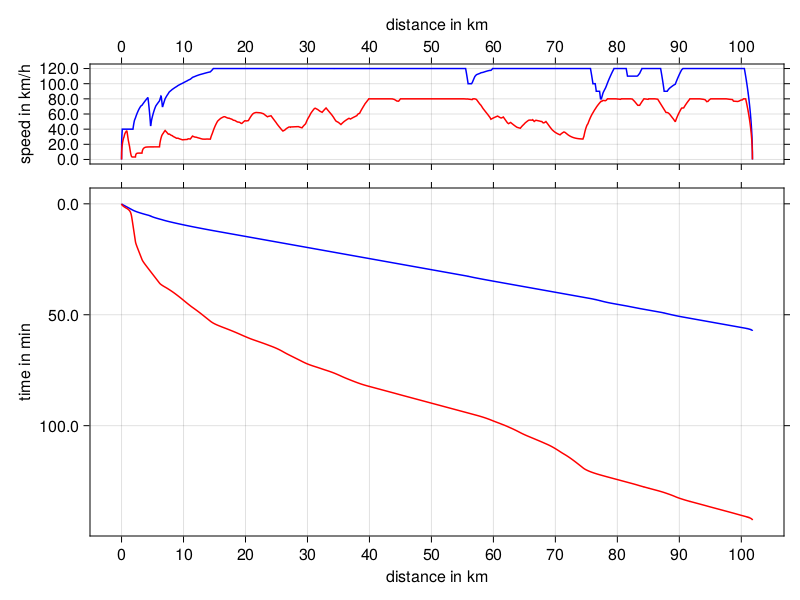

In [45]:
fig_realworld